# considerations on significance

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.special import ndtri

In [40]:
ndtri(chi2.cdf(10., 1.))

2.9545943049265344

In [2]:
def s_sqrt(s, b):
    """
    significance per sqrt(time) from 
    Bityukov and Krasnikov (1998)
    https://www.worldscientific.com/doi/epdf/10.1142/S0217732398003442
    """
    return 2. * (np.sqrt(s + b) - np.sqrt(b))

In [42]:
def s_lnl(s,b):
    """
    significance from likelihood ratio
    """
    return 2. * ((b + s) * np.log(b + s) - (b + s) * np.log(b) - s)

In [73]:
s = np.logspace(-8., -3., 6)
print(s)

[1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03]


In [74]:
b = np.logspace(-8., -1., 100)

In [75]:
ss, bb = np.meshgrid(s, b, indexing='ij')

In [76]:
s1 = s_sqrt(ss, bb)
s2 = s_lnl(ss, bb)

In [77]:
tobs = 20. * 3600. * 24.

Text(0, 0.5, '$S$')

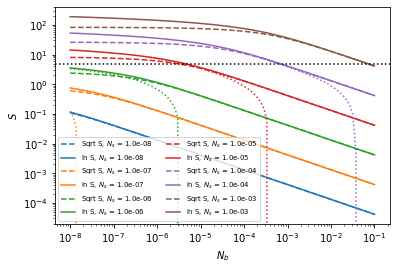

In [108]:
for i_s, s_i in enumerate(s):
    plt.loglog(b, s1[i_s] * np.sqrt(tobs), label=f'Sqrt S, $N_s$ = {s_i:.1e}', ls='--', color=f'C{i_s}')
    
    plt.loglog(b, np.sqrt(s2[i_s] * tobs), label=f'ln S, $N_s$ = {s_i:.1e}', ls='-', color=f'C{i_s}')
    plt.loglog(b, ndtri(chi2.cdf(s2[i_s] * tobs, 1.)), ls=':', color=f'C{i_s}')
plt.axhline(5., color='k', ls=":")
plt.legend(ncol=2, fontsize='x-small')
#plt.grid(which='both')
plt.xlabel("$N_b$")
plt.ylabel("$S$")

Text(0, 0.5, '$S$')

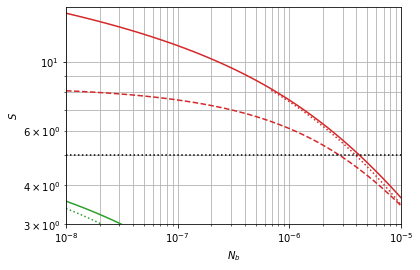

In [111]:
for i_s, s_i in enumerate(s):
    plt.loglog(b, s1[i_s] * np.sqrt(tobs), label=f'Sqrt S, $N_s$ = {s_i:.1e}', ls='--', color=f'C{i_s}')
    
    plt.loglog(b, np.sqrt(s2[i_s] * tobs), label=f'ln S, $N_s$ = {s_i:.1e}', ls='-', color=f'C{i_s}')
    plt.loglog(b, ndtri(chi2.cdf(s2[i_s] * tobs, 1.)), ls=':', color=f'C{i_s}')
plt.axhline(5., color='k', ls=":")
#plt.legend(ncol=2, fontsize='x-small')
plt.axis([1e-8, 1e-5, 3., 15.])
plt.grid(which='both')
plt.xlabel("$N_b$")
plt.ylabel("$S$")

### derivative

In [79]:
dS_db = 1. / np.sqrt(ss + bb) - 1. / np.sqrt(bb)
dS_ds = 1. / np.sqrt(ss + bb)

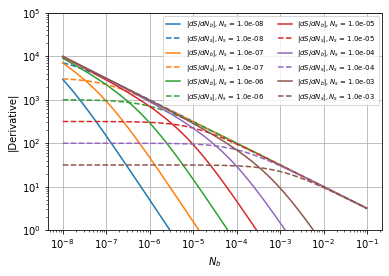

In [95]:
for i_s, s_i in enumerate(s):
    plt.loglog(b, np.abs(dS_db[i_s]), label=f'$|dS/dN_b|, N_s$ = {s_i:.1e}', ls='-', color=f'C{i_s}')
    
    plt.loglog(b, np.abs(dS_ds[i_s]), label=f'$|dS/dN_s|, N_s$ = {s_i:.1e}', ls='--', color=f'C{i_s}')
    
plt.legend(ncol=2, fontsize='x-small')
plt.ylim(1, 1e5)
plt.xlabel("$N_b$")
plt.ylabel("|Derivative|")
plt.grid(which='major')

Derivative $|dS / dN_b|$ dominates for strong signal and low background. Once background becomes sufficiently large, 
$|dS / dN_s|$ dominates. For larger signals, $|dS / dN_b|$ dominates for ever lager values of $N_b$. Up to that point, $|dS / dN_s|$ is constant. For a signal rate of $10^{-5}$ Hz, we will gain a lot more in terms of significance if we reduce the background below a level of $10^{-5}$Hz 